In [ ]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
data = pd.read_csv('ShortwavFluxVsTranspiration2003-2023.csv')

In [ ]:
data.sample(5)

,DATETIME,ShortwavFlux2003-2023,Transpiration2003-2023
137,01/07/2014,289.72,48.32
181,01/03/2018,185.48,0.45
249,01/11/2023,117.62,13.09
85,01/03/2010,170.04,0.00
246,01/08/2023,253.19,51.92


In [ ]:
print(f'Any NaN values among the data? {data.isna().values.any()}')

Any NaN values among the data? False


In [ ]:
print(f'Any duplicates? {data.duplicated().values.any()}')

duplicated_rows = data[data.duplicated()]
print(f'Number of duplicates: {len(duplicated_rows)}')

Any duplicates? False
Number of duplicates: 0


In [ ]:
data.describe()

,ShortwavFlux2003-2023,Transpiration2003-2023
count,250.00,250.00
mean,189.62,17.23
std,70.29,17.74
min,72.82,0.00
25%,119.23,0.59
50%,194.74,10.54
75%,255.05,33.09
max,309.63,61.88


In [ ]:
# Show NaN values and data types per column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATETIME                250 non-null    object 
 1   ShortwavFlux2003-2023   250 non-null    float64
 2   Transpiration2003-2023  250 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.0+ KB


In [ ]:
data.head()

,DATETIME,ShortwavFlux2003-2023,Transpiration2003-2023
0,01/02/2003,114.02,0.00
1,01/03/2003,178.19,0.00
2,01/04/2003,211.44,1.89
3,01/05/2003,195.76,8.73
4,01/06/2003,263.59,20.24


In [ ]:
# Convert DATETIME column to Pandas Datetime data type
data.DATETIME = pd.to_datetime(data.DATETIME)

In [ ]:
X = DataFrame(data, columns=['ShortwavFlux2003-2023'])
y = DataFrame(data, columns=['Transpiration2003-2023'])
print(X)
print(y)

     ShortwavFlux2003-2023
0                   114.02
1                   178.19
2                   211.44
3                   195.76
4                   263.59
..                     ...
245                 276.05
246                 253.19
247                 207.86
248                 177.02
249                 117.62

[250 rows x 1 columns]
     Transpiration2003-2023
0                      0.00
1                      0.00
2                      1.89
3                      8.73
4                     20.24
..                      ...
245                   28.73
246                   51.92
247                   41.01
248                   19.33
249                   13.09

[250 rows x 1 columns]


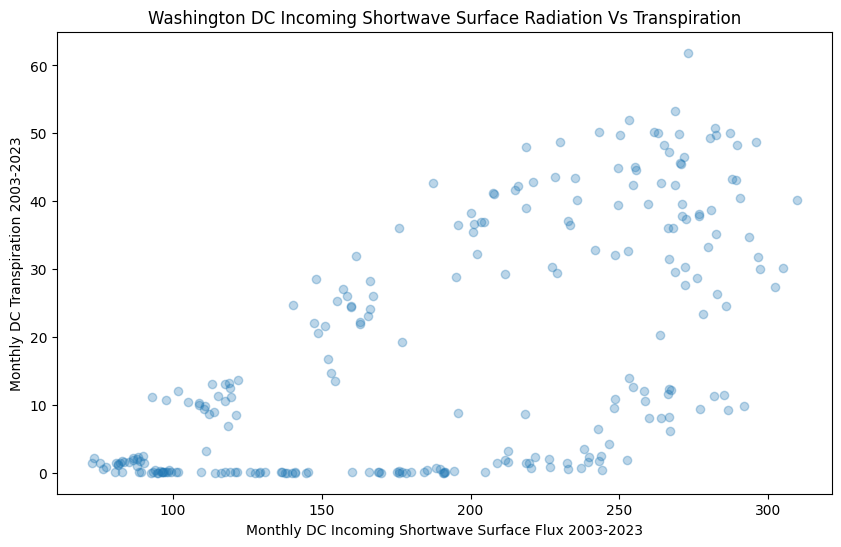

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3)
plt.title('Washington DC Incoming Shortwave Surface Radiation Vs Transpiration')
plt.xlabel('Monthly DC Incoming Shortwave Surface Flux 2003-2023')
plt.ylabel('Monthly DC Transpiration 2003-2023')
plt.xlim()
plt.ylim()
plt.show()

In [ ]:
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

Slope coefficient:

In [ ]:
regression.coef_    # theta_1

array([[0.15931859]])

In [ ]:
#Intercept
regression.intercept_

array([-12.98077004])

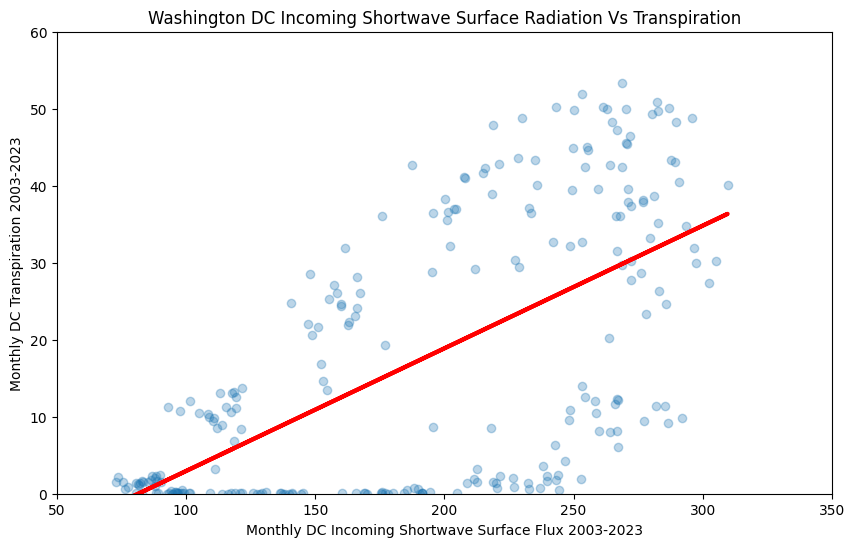

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3)

# Adding the regression line here:
plt.plot(X, regression.predict(X), color='red', linewidth=3)

plt.title('Washington DC Incoming Shortwave Surface Radiation Vs Transpiration')
plt.xlabel('Monthly DC Incoming Shortwave Surface Flux 2003-2023')
plt.ylabel('Monthly DC Transpiration 2003-2023')

plt.xlim(50, 350)
plt.ylim(0, 60)
plt.show()

In [ ]:
#Getting r square from Regression
regression.score(X, y)

0.3986096568529025